In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')

In [5]:
print("📊 Starting Apriori Analysis for Groceries Dataset")
print("=" * 50)

📊 Starting Apriori Analysis for Groceries Dataset


# STEP 1: LOAD & EXPLORE DATASET

In [6]:
df = pd.read_csv('Groceries data.csv')

In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

Dataset shape: (38765, 7)
Columns: ['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day', 'day_of_week']

First 5 rows:
   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

Data types:
Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------          

# STEP 2: DATA EXPLORATION

In [8]:
print("\n🔍 DATA EXPLORATION")
print("=" * 30)


🔍 DATA EXPLORATION


In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


In [10]:
print(f"\nUnique Members: {df['Member_number'].nunique()}")
print(f"Unique Items: {df['itemDescription'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total records: {len(df)}")


Unique Members: 3898
Unique Items: 167
Date range: 2014-01-01 to 2015-12-30
Total records: 38765


In [11]:
print("\n📈 Top 15 Most Popular Items:")
item_counts = df['itemDescription'].value_counts().head(15)
print(item_counts)


📈 Top 15 Most Popular Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64


In [12]:
item_percentages = (item_counts / len(df) * 100).round(2)
print("\nAs percentages of total purchases:")
print(item_percentages)


As percentages of total purchases:
itemDescription
whole milk          6.45
other vegetables    4.90
rolls/buns          4.43
soda                3.91
yogurt              3.44
root vegetables     2.76
tropical fruit      2.66
bottled water       2.41
sausage             2.38
citrus fruit        2.09
pastry              2.03
pip fruit           1.92
shopping bags       1.89
canned beer         1.85
bottled beer        1.77
Name: count, dtype: float64


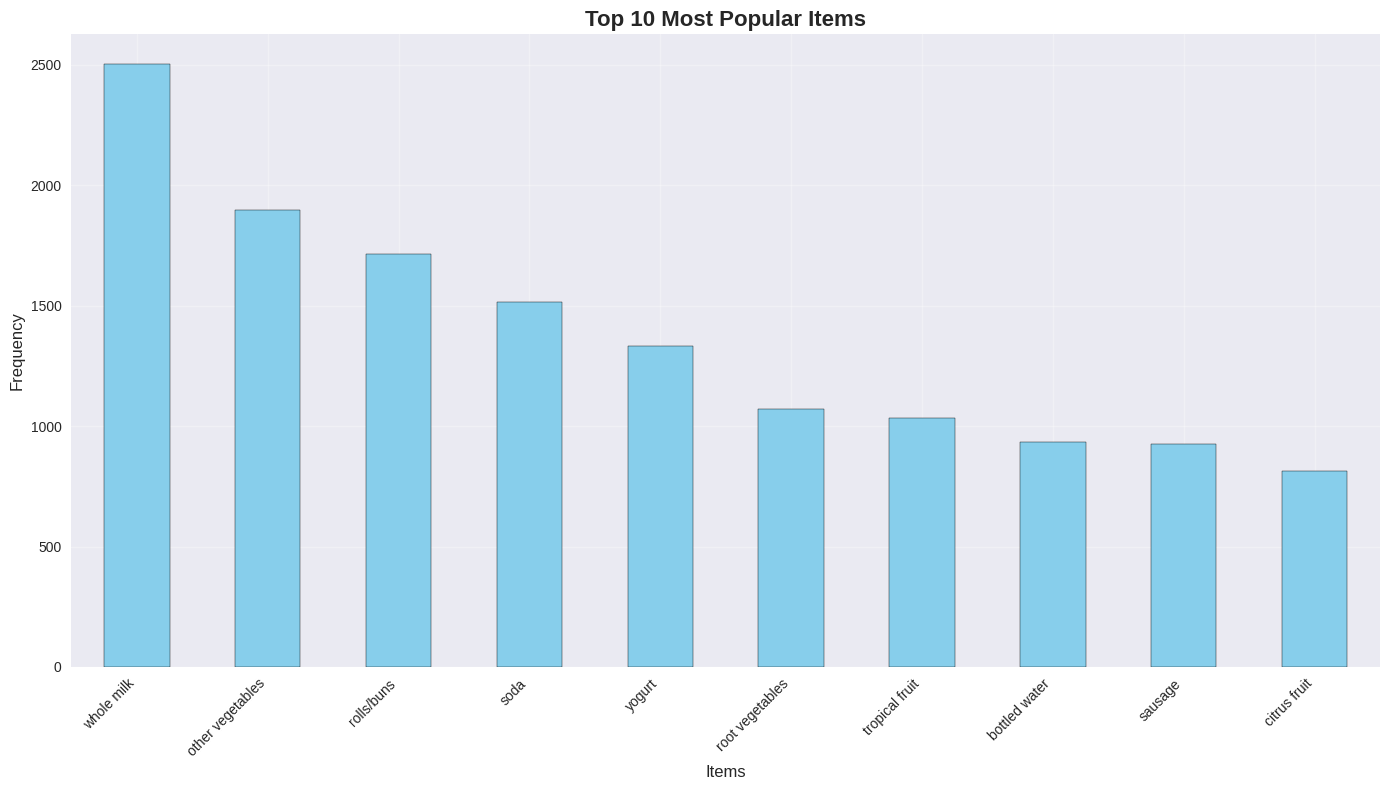

In [13]:
plt.figure(figsize=(14, 8))
item_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Items', fontsize=16, fontweight='bold')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# STEP 3: TEMPORAL ANALYSIS

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
print("\n📅 TEMPORAL ANALYSIS")
print("=" * 20)


📅 TEMPORAL ANALYSIS


In [16]:
yearly_counts = df['year'].value_counts().sort_index()
print("Purchases per year:")
print(yearly_counts)

Purchases per year:
year
2014    18277
2015    20488
Name: count, dtype: int64


In [17]:
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
             4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['day_name'] = df['day_of_week'].map(day_names)

In [18]:
dow_counts = df['day_name'].value_counts()
print("\nPurchases per day of week:")
print(dow_counts)


Purchases per day of week:
day_name
Wednesday    5754
Tuesday      5663
Saturday     5624
Monday       5524
Thursday     5504
Friday       5397
Sunday       5299
Name: count, dtype: int64


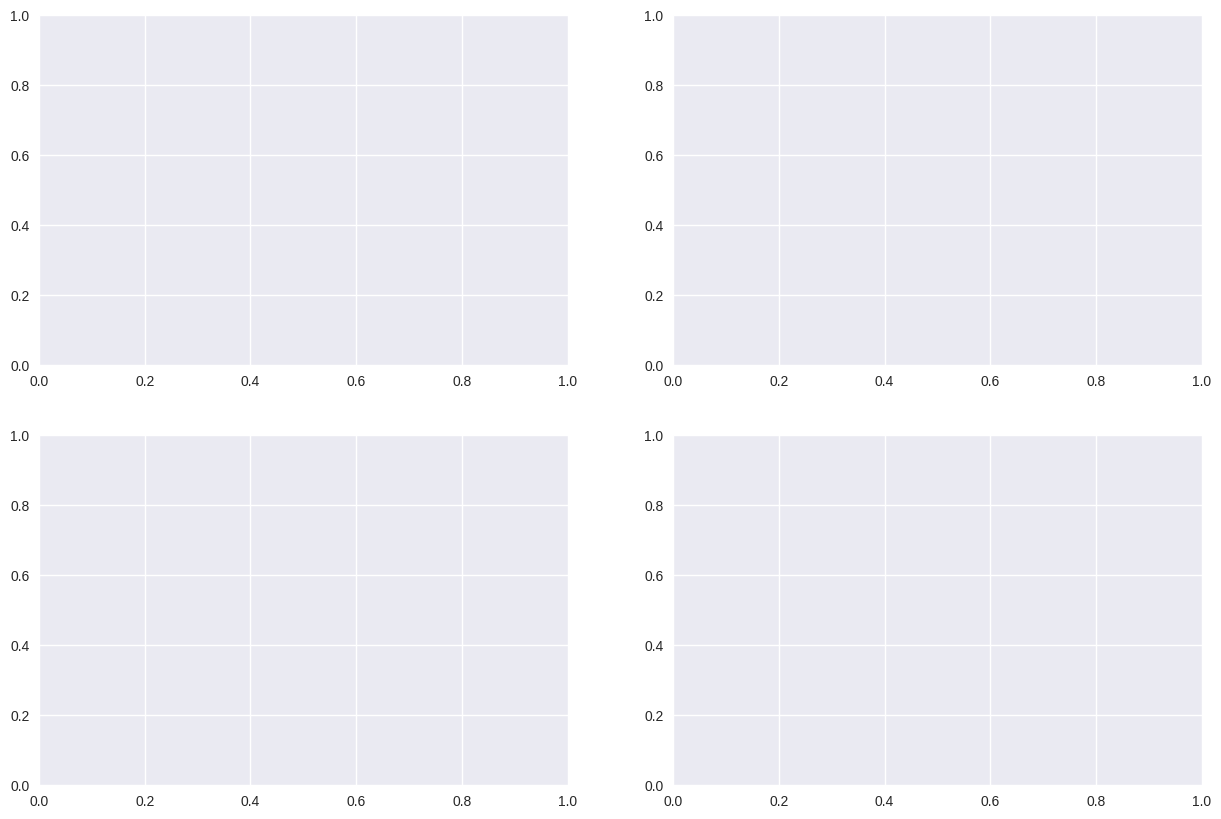

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [20]:
yearly_counts.plot(kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('Purchases by Year')
axes[0,0].set_ylabel('Number of Purchases')

Text(4.444444444444452, 0.5, 'Number of Purchases')

In [21]:
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts_ordered = dow_counts.reindex(dow_order)
dow_counts_ordered.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Purchases by Day of Week')
axes[0,1].set_ylabel('Number of Purchases')
axes[0,1].tick_params(axis='x', rotation=45)

In [22]:
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Purchases by Month')
axes[1,0].set_ylabel('Number of Purchases')

Text(4.444444444444452, 0.5, 'Number of Purchases')

In [23]:
monthly_diversity = df.groupby('month')['itemDescription'].nunique()
monthly_diversity.plot(kind='line', ax=axes[1,1], marker='o', color='purple')
axes[1,1].set_title('Item Diversity by Month')
axes[1,1].set_ylabel('Number of Unique Items')
axes[1,1].set_xlabel('Month')

Text(0.5, 4.4444444444444375, 'Month')

In [24]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

# STEP 4: CREATE MARKET BASKET FORMAT

In [25]:
print("\n🛒 CREATING MARKET BASKET FORMAT")
print("=" * 35)


🛒 CREATING MARKET BASKET FORMAT


In [26]:
df['Transaction_ID'] = df['Member_number'].astype(str) + '_' + df['Date'].dt.strftime('%Y-%m-%d')

print(f"Total unique transactions: {df['Transaction_ID'].nunique()}")
print(f"Total individual item purchases: {len(df)}")

Total unique transactions: 14963
Total individual item purchases: 38765


In [27]:
basket_data = df.groupby('Transaction_ID')['itemDescription'].apply(list).reset_index()
basket_data.columns = ['Transaction_ID', 'Items']

In [28]:
print("\nSample basket data:")
for i in range(3):
    trans_id = basket_data.iloc[i]['Transaction_ID']
    items = basket_data.iloc[i]['Items']
    print(f"Transaction {trans_id}: {items}")


Sample basket data:
Transaction 1000_2014-06-24: ['whole milk', 'pastry', 'salty snack']
Transaction 1000_2015-03-15: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 1000_2015-05-27: ['soda', 'pickled vegetables']


In [29]:
transaction_sizes = basket_data['Items'].apply(len)
print(f"\n📊 TRANSACTION SIZE ANALYSIS")
print(f"Mean items per transaction: {transaction_sizes.mean():.2f}")
print(f"Median items per transaction: {transaction_sizes.median():.2f}")
print(f"Max items in single transaction: {transaction_sizes.max()}")
print(f"Min items in single transaction: {transaction_sizes.min()}")


📊 TRANSACTION SIZE ANALYSIS
Mean items per transaction: 2.59
Median items per transaction: 2.00
Max items in single transaction: 11
Min items in single transaction: 2


In [30]:
size_distribution = transaction_sizes.value_counts().sort_index()
print("\nTransaction size distribution:")
print(size_distribution.head(10))


Transaction size distribution:
Items
2     10080
3      2698
4      1390
5       344
6       175
7        80
8       145
9        50
11        1
Name: count, dtype: int64


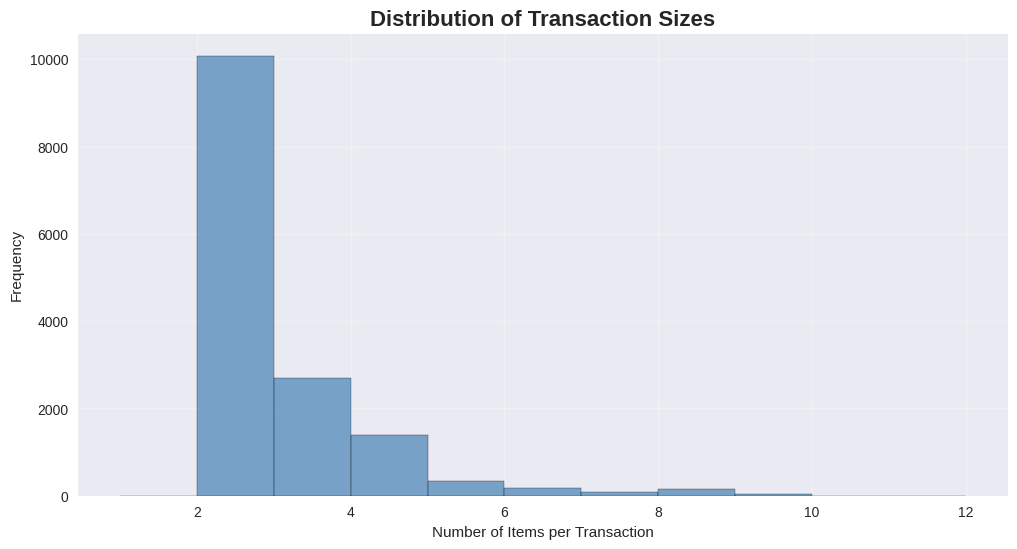

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(transaction_sizes, bins=range(1, min(transaction_sizes.max()+2, 21)),
         alpha=0.7, edgecolor='black', color='steelblue')
plt.title('Distribution of Transaction Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

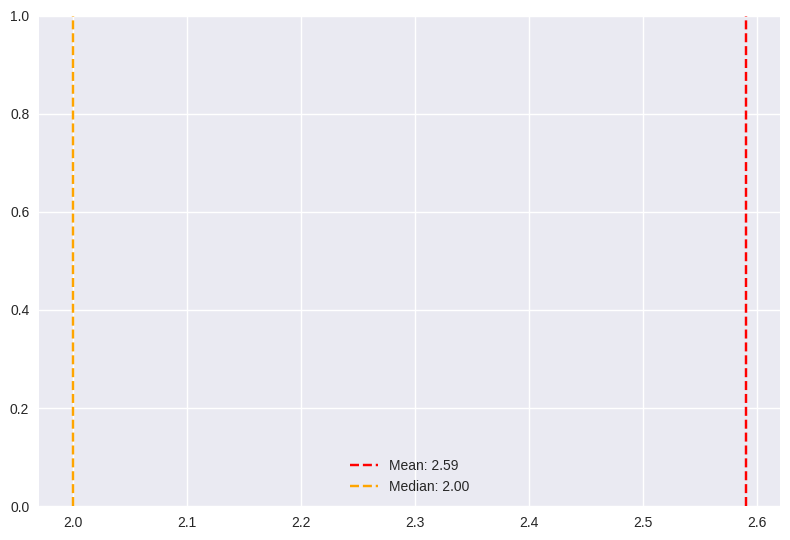

In [32]:
plt.axvline(transaction_sizes.mean(), color='red', linestyle='--',
           label=f'Mean: {transaction_sizes.mean():.2f}')
plt.axvline(transaction_sizes.median(), color='orange', linestyle='--',
           label=f'Median: {transaction_sizes.median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# STEP 5: PREPARE DATA FOR APRIORI

In [33]:
print("\n⚙️ PREPARING DATA FOR APRIORI")
print("=" * 32)


⚙️ PREPARING DATA FOR APRIORI


In [34]:
transactions = basket_data['Items'].tolist()

In [35]:
print(f"Total transactions: {len(transactions)}")
print("Sample transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {trans}")

Total transactions: 14963
Sample transactions:
Transaction 1: ['whole milk', 'pastry', 'salty snack']
Transaction 2: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 3: ['soda', 'pickled vegetables']
Transaction 4: ['canned beer', 'misc. beverages']
Transaction 5: ['sausage', 'hygiene articles']


In [36]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

In [37]:
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [38]:
print(f"\nBinary matrix shape: {df_encoded.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print("\nSample of binary matrix:")
print(df_encoded.head())


Binary matrix shape: (14963, 167)
Number of unique items: 167

Sample of binary matrix:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  beverages  bottled beer  bottled water  brandy  brown bread  butter  butter milk  cake bar  candles  candy  canned beer  canned fish  canned fruit  canned vegetables  cat food  cereals  chewing gum  chicken  chocolate  chocolate marshmallow  citrus fruit  cleaner  cling film/bags  cocoa drinks  coffee  condensed milk  cooking chocolate  cookware  cream  cream cheese    curd  curd cheese  decalcifier  dental care  dessert  detergent  dish cleaner  dishes  dog food  domestic eggs  female sanitary products  finished products   fish  flour  flower (seeds)  flower soil/fertilizer  frankfurter  frozen chicken  frozen dessert  frozen fish  frozen fruits  frozen meals  frozen potato products  frozen vegetables  fruit/vegetable juice  grapes  hair spray    ham  hamb

In [39]:
sparsity = (df_encoded == 0).sum().sum() / (df_encoded.shape[0] * df_encoded.shape[1])
print(f"\nMatrix sparsity: {sparsity:.2%}")
print("(Sparsity tinggi = banyak kombinasi item yang jarang dibeli bersamaan)")


Matrix sparsity: 98.48%
(Sparsity tinggi = banyak kombinasi item yang jarang dibeli bersamaan)


In [40]:
item_support = df_encoded.mean().sort_values(ascending=False)
print(f"\nTop 10 items by support:")
print(item_support.head(10))


Top 10 items by support:
whole milk          0.157923
other vegetables    0.122101
rolls/buns          0.110005
soda                0.097106
yogurt              0.085879
root vegetables     0.069572
tropical fruit      0.067767
bottled water       0.060683
sausage             0.060349
citrus fruit        0.053131
dtype: float64


In [41]:
print(f"\nLowest support among top 50 items: {item_support.head(50).min():.4f}")
print("This can help us decide minimum support threshold")


Lowest support among top 50 items: 0.0152
This can help us decide minimum support threshold


In [42]:
print("\n🔥 RUNNING APRIORI ALGORITHM")
print("=" * 30)


🔥 RUNNING APRIORI ALGORITHM


In [43]:
min_support = 0.01

In [44]:
print(f"Minimum support threshold: {min_support} ({min_support*100}%)")
print(f"This means itemsets must appear in at least {int(min_support * len(transactions))} transactions")

Minimum support threshold: 0.01 (1.0%)
This means itemsets must appear in at least 149 transactions


In [45]:
print("\nRunning Apriori algorithm...")
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True, verbose=1)


Running Apriori algorithm...
Processing 18 combinations | Sampling itemset size 3


In [46]:
print(f"\nFound {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 frequent itemsets by support:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


Found 69 frequent itemsets

Top 10 frequent itemsets by support:
     support            itemsets
62  0.157923        (whole milk)
40  0.122101  (other vegetables)
46  0.110005        (rolls/buns)
52  0.097106              (soda)
63  0.085879            (yogurt)
47  0.069572   (root vegetables)
57  0.067767    (tropical fruit)
5   0.060683     (bottled water)
49  0.060349           (sausage)
15  0.053131      (citrus fruit)


In [47]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
itemset_lengths = frequent_itemsets['length'].value_counts().sort_index()

In [48]:
print("\nFrequent itemsets by length:")
print(itemset_lengths)


Frequent itemsets by length:
length
1    64
2     5
Name: count, dtype: int64


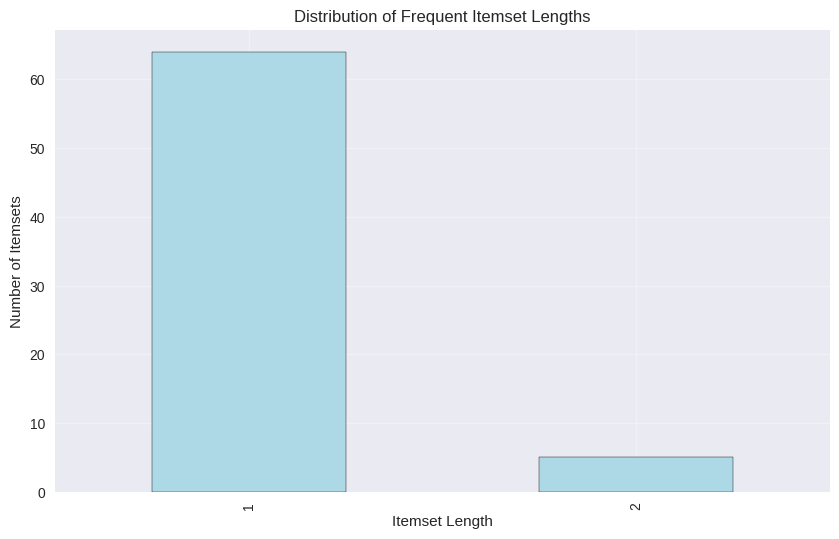

In [49]:
plt.figure(figsize=(10, 6))
itemset_lengths.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Frequent Itemset Lengths')
plt.xlabel('Itemset Length')
plt.ylabel('Number of Itemsets')
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
print("\n📋 GENERATING ASSOCIATION RULES")
print("=" * 35)


📋 GENERATING ASSOCIATION RULES


In [51]:
min_confidence = 0.3   # 30% confidence
min_lift = 1.2         # 20% better than random

In [52]:
print(f"Minimum confidence: {min_confidence} ({min_confidence*100}%)")
print(f"Minimum lift: {min_lift}")

Minimum confidence: 0.3 (30.0%)
Minimum lift: 1.2


In [53]:
rules = association_rules(frequent_itemsets, metric="confidence",
                         min_threshold=min_confidence, num_itemsets=len(frequent_itemsets))

# Filter by lift
rules = rules[rules['lift'] >= min_lift]

In [54]:
print(f"\nGenerated {len(rules)} association rules")


Generated 0 association rules


In [55]:
if len(rules) > 0:
    print("\nTop 10 rules by confidence:")
    top_rules = rules.sort_values('confidence', ascending=False).head(10)

    for idx, rule in top_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"If {antecedent} → then {consequent}")
        print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}\n")
else:
    print("No rules found with current thresholds. Consider lowering min_confidence or min_lift.")

No rules found with current thresholds. Consider lowering min_confidence or min_lift.


In [56]:
if len(rules) > 0:
    print("📊 RULES ANALYSIS")
    print("=" * 17)

    print(f"Rules statistics:")
    print(f"Average confidence: {rules['confidence'].mean():.3f}")
    print(f"Average lift: {rules['lift'].mean():.3f}")
    print(f"Average support: {rules['support'].mean():.3f}")

    # Show distribution of metrics
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    rules['confidence'].hist(bins=20, ax=axes[0], alpha=0.7, color='skyblue')
    axes[0].set_title('Distribution of Confidence')
    axes[0].set_xlabel('Confidence')

    rules['lift'].hist(bins=20, ax=axes[1], alpha=0.7, color='lightgreen')
    axes[1].set_title('Distribution of Lift')
    axes[1].set_xlabel('Lift')

    rules['support'].hist(bins=20, ax=axes[2], alpha=0.7, color='salmon')
    axes[2].set_title('Distribution of Support')
    axes[2].set_xlabel('Support')

    plt.tight_layout()
    plt.show()

    # Top rules by different metrics
    print("\n🏆 TOP RULES BY DIFFERENT METRICS")
    print("=" * 35)

    print("Top 5 rules by CONFIDENCE:")
    top_conf = rules.sort_values('confidence', ascending=False).head(5)
    for idx, rule in top_conf.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Confidence: {rule['confidence']:.3f})")

    print("\nTop 5 rules by LIFT:")
    top_lift = rules.sort_values('lift', ascending=False).head(5)
    for idx, rule in top_lift.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"{antecedent} → {consequent} (Lift: {rule['lift']:.3f})")